In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import contextily as ctx

In [23]:
perimeters = gpd.read_file('hist.shp')
print(perimeters.shape)
perimeters = perimeters[~perimeters.year.isna()]
perimeters.year = perimeters.year.astype(int)
print(perimeters.shape)

(92531, 14)
(92474, 14)


In [24]:
perimeters.head()

,id,year,fire_name,agency,acres,mapmethod,inciwebid,alarm_date,cont_date,comments,complex_na,perimeter_,cause,geometry
0,view_historical_fires.fid--6c64548_17013a0304a...,2006,Bar Complex,USFS,8549.790,None,None,None,None,Pigeon Fire,None,2006-09-09,None,"MULTIPOLYGON (((-123.13544 40.80920, -123.1350..."
1,view_historical_fires.fid--6c64548_17013a0304a...,2006,Ralston,USFS,4260.292,None,None,None,None,None,None,2006-09-09,None,"POLYGON ((-120.66164 39.02016, -120.66182 39.0..."
2,view_historical_fires.fid--6c64548_17013a0304a...,2006,Uncles Complex,USFS,12385.665,None,None,None,None,Hancock Fire,None,2006-09-09,None,"MULTIPOLYGON (((-123.24093 41.48353, -123.2409..."
3,view_historical_fires.fid--6c64548_17013a0304a...,2006,Red Mountain,USFS,32828.199,None,None,None,None,None,None,2006-09-08,None,"MULTIPOLYGON (((-115.28717 44.40964, -115.2884..."
4,view_historical_fires.fid--6c64548_17013a0304a...,2006,Derby,USFS,204864.145,None,None,None,None,None,None,2006-09-08,None,"POLYGON ((-110.10493 45.60148, -110.10340 45.6..."


In [25]:
# Latitude and longitude bounding box for San Diego county
from shapely.geometry import Point
MIN_LAT, MAX_LAT = 32.4, 33.6
MIN_LONG, MAX_LONG = -118, -116
sd_perimeters = perimeters.cx[MIN_LONG:MAX_LONG, MIN_LAT:MAX_LAT]
print(sd_perimeters.shape)
sd_perimeters.crs = {'init' :'epsg:4326'}
sd_perimeters = sd_perimeters.to_crs(epsg=3857)
sd_perimeters.head()

(2004, 14)


C:\Users\Mike\AppData\Local\Continuum\anaconda3\envs\geo\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,id,year,fire_name,agency,acres,mapmethod,inciwebid,alarm_date,cont_date,comments,complex_na,perimeter_,cause,geometry
230,view_historical_fires.fid--6c64548_17013a0304a...,2006,Bonny,BLM,35.437000,None,None,None,None,None,None,2006-06-06,None,"POLYGON ((-12995890.859 3957307.752, -12995871..."
272,view_historical_fires.fid--6c64548_17013a0304a...,2006,BORDER 15,CDF,19.854897,None,None,None,None,GPS Ground; No entry in FireCode,None,2006-07-15,None,"POLYGON ((-12979988.108 3839621.915, -12979959..."
285,view_historical_fires.fid--6c64548_17013a0304a...,2006,CAMINO,CDF,2.808180,None,None,None,None,No entry in FireCode,None,2006-02-09,None,"POLYGON ((-13043399.240 3931031.704, -13043396..."
589,view_historical_fires.fid--6c64548_17013a0304a...,2006,Horse Fire,USFS,7041.781000,None,None,None,None,None,None,2006-07-24,None,"POLYGON ((-12987535.465 3863086.369, -12987437..."
673,view_historical_fires.fid--6c64548_17013a0304a...,2006,Cottonwood,BLM,24.682000,None,None,None,None,None,None,2006-05-03,None,"POLYGON ((-12950472.197 3869481.934, -12950496..."


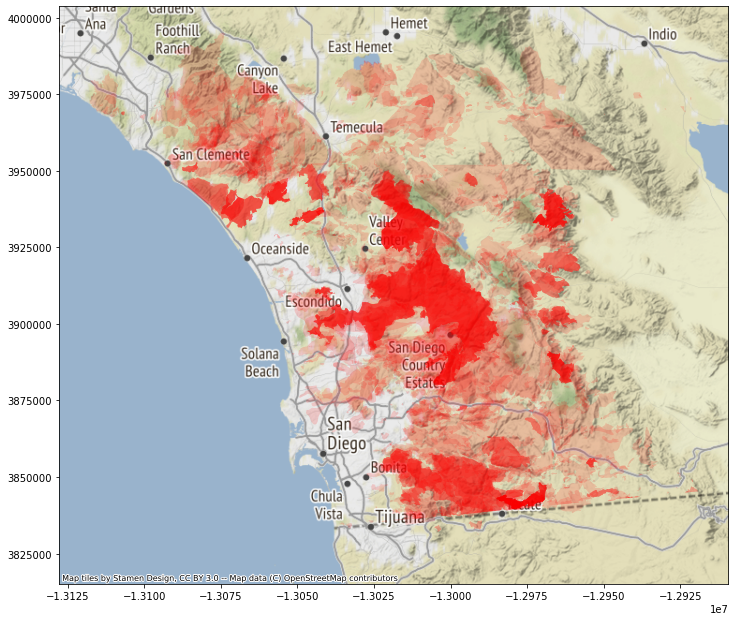

In [29]:
f, ax = plt.subplots(1, figsize=(12, 12))
sd_perimeters.plot(ax=ax, color='red', alpha=.15)
ctx.add_basemap(ax)

(609, 14)


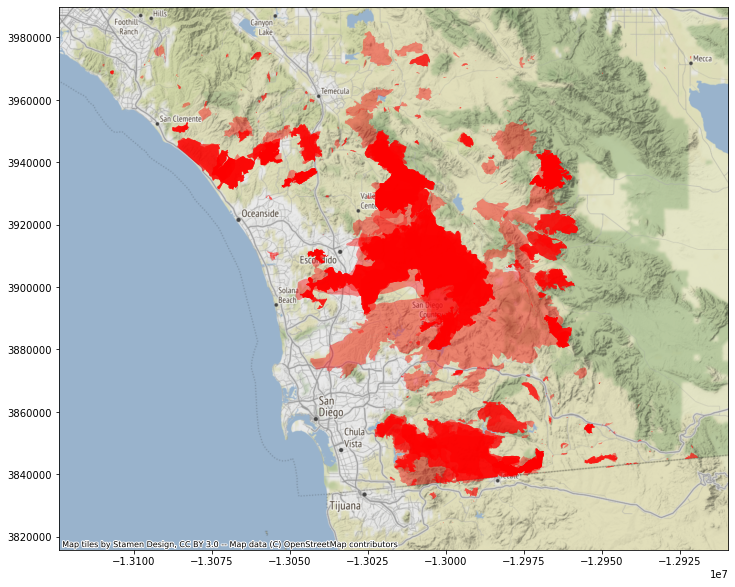

In [34]:
f, ax = plt.subplots(1, figsize=(12, 12))
print(sd_perimeters[sd_perimeters.year >= 2000].shape)
sd_perimeters[sd_perimeters.year >= 2000].plot(ax=ax, color='red', alpha=.4)
ctx.add_basemap(ax)

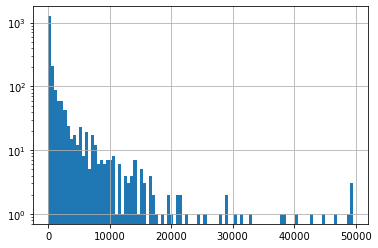

In [35]:
mask = sd_perimeters.acres < 50000
sd_perimeters[mask].acres.hist(bins=100, log=True)

In [40]:
# The associated date for a perimeter is stored in the perimeter_ field,
# which appears to have some data quality issues.
# Here we will split it up and look at the individual year, month, and day values
# in order to identify quality issues.
print(perimeters.perimeter_.head())
mask = ~perimeters.perimeter_.isna()
splitter = perimeters[mask].perimeter_.apply(lambda x: (x.split("-") if x is not None else x))
y, m, d = splitter.apply(lambda x: x[0]), splitter.apply(lambda x: x[1]), splitter.apply(lambda x: x[2])

0    2006-09-09
1    2006-09-09
2    2006-09-09
3    2006-09-08
4    2006-09-08
Name: perimeter_, dtype: object


In [45]:
y.astype(int).describe(), m.astype(int).describe(), d.astype(int).describe()

(count    59321.000000
 mean      2012.767620
 std          7.509057
 min        715.000000
 25%       2010.000000
 50%       2013.000000
 75%       2016.000000
 max       2415.000000
 Name: perimeter_, dtype: float64,
 count    59321.000000
 mean         7.523272
 std          1.510751
 min          1.000000
 25%          7.000000
 50%          8.000000
 75%          8.000000
 max         12.000000
 Name: perimeter_, dtype: float64,
 count    59321.000000
 mean        15.898737
 std          8.934559
 min          1.000000
 25%          8.000000
 50%         16.000000
 75%         24.000000
 max         31.000000
 Name: perimeter_, dtype: float64)

The preceding analysis shows that some year values are incorrect (e.g. year 715 and 2415 are suspect).